<a href="https://colab.research.google.com/github/sujithcplusplus/facial_feature_mapping/blob/main/Facial_feature_mapping_Data_Augmented_Model_with_mirror_Images_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/drive/MyDrive/Facial Feature Mapping Project/Dataset.zip','r')
zip_ref.extractall()
zip_ref.close()

In [ ]:
import pandas as pd
coordinates = pd.read_csv('training.csv')
coordinates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7049 entries, 0 to 7048
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   left_eye_center_x          7039 non-null   float64
 1   left_eye_center_y          7039 non-null   float64
 2   right_eye_center_x         7036 non-null   float64
 3   right_eye_center_y         7036 non-null   float64
 4   left_eye_inner_corner_x    2271 non-null   float64
 5   left_eye_inner_corner_y    2271 non-null   float64
 6   left_eye_outer_corner_x    2267 non-null   float64
 7   left_eye_outer_corner_y    2267 non-null   float64
 8   right_eye_inner_corner_x   2268 non-null   float64
 9   right_eye_inner_corner_y   2268 non-null   float64
 10  right_eye_outer_corner_x   2268 non-null   float64
 11  right_eye_outer_corner_y   2268 non-null   float64
 12  left_eyebrow_inner_end_x   2270 non-null   float64
 13  left_eyebrow_inner_end_y   2270 non-null   float

In [ ]:
coordinates.isnull().sum()

left_eye_center_x              10
left_eye_center_y              10
right_eye_center_x             13
right_eye_center_y             13
left_eye_inner_corner_x      4778
left_eye_inner_corner_y      4778
left_eye_outer_corner_x      4782
left_eye_outer_corner_y      4782
right_eye_inner_corner_x     4781
right_eye_inner_corner_y     4781
right_eye_outer_corner_x     4781
right_eye_outer_corner_y     4781
left_eyebrow_inner_end_x     4779
left_eyebrow_inner_end_y     4779
left_eyebrow_outer_end_x     4824
left_eyebrow_outer_end_y     4824
right_eyebrow_inner_end_x    4779
right_eyebrow_inner_end_y    4779
right_eyebrow_outer_end_x    4813
right_eyebrow_outer_end_y    4813
nose_tip_x                      0
nose_tip_y                      0
mouth_left_corner_x          4780
mouth_left_corner_y          4780
mouth_right_corner_x         4779
mouth_right_corner_y         4779
mouth_center_top_lip_x       4774
mouth_center_top_lip_y       4774
mouth_center_bottom_lip_x      33
mouth_center_b

In [ ]:
import numpy as np
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan, strategy='mean')

si_coordinates = pd.DataFrame(imputer.fit_transform(coordinates), columns=coordinates.columns)

In [ ]:
import tensorflow as tf
from PIL import Image
import glob
import os
paths = sorted(glob.glob('/content/images/train_images/*'))

In [ ]:
from PIL import Image
import numpy as np
image_tensors = []
for i in paths:
  itensor = tf.image.rgb_to_grayscale(tf.convert_to_tensor(Image.open(i),dtype=tf.float32))
  image_tensors.append(itensor)

for i in paths:
  img = Image.open(i)
  itensor = tf.image.rgb_to_grayscale(tf.convert_to_tensor(img.transpose(Image.FLIP_LEFT_RIGHT),dtype=tf.float32))
  image_tensors.append(itensor)


image_tensors = np.array(image_tensors)

In [ ]:
import pandas as pd


modified_coordinates = pd.DataFrame(columns=si_coordinates.columns)

for col in si_coordinates.columns:
    new_coordinates = []

    if col.endswith('x'):
        new_coordinates = 96 - si_coordinates[col]
    else:
        new_coordinates = si_coordinates[col]

    modified_coordinates[col] = new_coordinates

In [ ]:
import pandas as pd

modified_coordinates_swapped = modified_coordinates.copy()

left_right_pairs = {
    'left_eye_center_x': 'right_eye_center_x',
    'left_eye_center_y': 'right_eye_center_y',
    'left_eye_inner_corner_x': 'right_eye_inner_corner_x',
    'left_eye_inner_corner_y': 'right_eye_inner_corner_y',
    'left_eye_outer_corner_x': 'right_eye_outer_corner_x',
    'left_eye_outer_corner_y': 'right_eye_outer_corner_y',
    'left_eyebrow_inner_end_x': 'right_eyebrow_inner_end_x',
    'left_eyebrow_inner_end_y': 'right_eyebrow_inner_end_y',
    'left_eyebrow_outer_end_x': 'right_eyebrow_outer_end_x',
    'left_eyebrow_outer_end_y': 'right_eyebrow_outer_end_y',
    'mouth_left_corner_x': 'mouth_right_corner_x',
    'mouth_left_corner_y': 'mouth_right_corner_y',
    'mouth_center_top_lip_x': 'mouth_center_top_lip_x',
    'mouth_center_top_lip_y': 'mouth_center_top_lip_y',
    'mouth_center_bottom_lip_x': 'mouth_center_bottom_lip_x',
    'mouth_center_bottom_lip_y': 'mouth_center_bottom_lip_y',

}

for left_col, right_col in left_right_pairs.items():
    modified_coordinates_swapped[left_col], modified_coordinates_swapped[right_col] = modified_coordinates[right_col].copy(), modified_coordinates[left_col].copy()

aug_coordinates = pd.concat([si_coordinates, modified_coordinates_swapped], ignore_index=True)


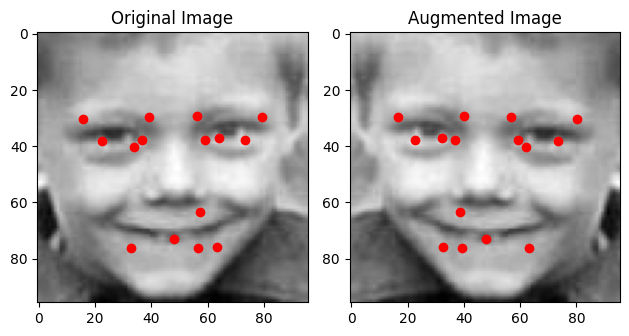

In [ ]:
import random
import matplotlib.pyplot as plt

IMGNo = random.randint(0, (len(image_tensors) // 2) - 1)


plt.subplot(1, 2, 1)  # 1 row, 2 columns, subplot 1
testImage1 = image_tensors[IMGNo]
plt.imshow(testImage1, cmap='gray')
plt.plot(aug_coordinates.iloc[IMGNo, ::2], aug_coordinates.iloc[IMGNo, 1::2], 'ro')
plt.title('Original Image')


plt.subplot(1, 2, 2)  # 1 row, 2 columns, subplot 2
testImage2 = image_tensors[IMGNo + 7049]
plt.imshow(testImage2, cmap='gray')
plt.plot(aug_coordinates.iloc[IMGNo + 7049, ::2], aug_coordinates.iloc[IMGNo + 7049, 1::2], 'ro')
plt.title('Augmented Image')

plt.tight_layout()
plt.show()


In [ ]:
X = []
for i in range(0,len(image_tensors)):
  Xi = image_tensors[i]/255.
  X.append(Xi)
X = np.array(X,dtype='float')

In [ ]:
y = []
for i in range(0,len(aug_coordinates)):
  y_i = aug_coordinates.iloc[i,:]
  y.append(y_i/96)

y = np.array(y,dtype='float')

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
import tensorflow as tf
model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,3,activation='relu',input_shape=(96,96,1)),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(64,3,activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(128,3,activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(256,3,activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(30,activation='linear'),
  ])

In [ ]:
model_1.compile(loss = 'mae',
                optimizer = 'adam',
                metrics = ['mae','mse'])

In [ ]:
model_1_history = model_1.fit(X_train,y_train,
            epochs = 50,
            batch_size = 128,
            validation_data = (X_val,y_val))

Epoch 1/50
89/89 [==============================] - 16s 57ms/step - loss: 0.0563 - mae: 0.0563 - mse: 0.0109 - val_loss: 0.0954 - val_mae: 0.0954 - val_mse: 0.0111
Epoch 2/50
89/89 [==============================] - 4s 47ms/step - loss: 0.0209 - mae: 0.0209 - mse: 0.0010 - val_loss: 0.0689 - val_mae: 0.0689 - val_mse: 0.0061
Epoch 3/50
89/89 [==============================] - 4s 45ms/step - loss: 0.0196 - mae: 0.0196 - mse: 9.7302e-04 - val_loss: 0.0593 - val_mae: 0.0593 - val_mse: 0.0047
Epoch 4/50
89/89 [==============================] - 4s 46ms/step - loss: 0.0186 - mae: 0.0186 - mse: 9.3159e-04 - val_loss: 0.0670 - val_mae: 0.0670 - val_mse: 0.0059
Epoch 5/50
89/89 [==============================] - 4s 47ms/step - loss: 0.0181 - mae: 0.0181 - mse: 9.1560e-04 - val_loss: 0.0365 - val_mae: 0.0365 - val_mse: 0.0021
Epoch 6/50
89/89 [==============================] - 4s 45ms/step - loss: 0.0178 - mae: 0.0178 - mse: 9.0648e-04 - val_loss: 0.0414 - val_mae: 0.0414 - val_mse: 0.0026
Epoch

In [ ]:
model_1_predictions = model_1.predict(X_val)

89/89 [==============================] - 1s 4ms/step


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

model_1_mse = mean_squared_error(y_val*96,model_1_predictions*96)
model_1_mae = mean_absolute_error(y_val*96,model_1_predictions*96)

model_1_mse,model_1_mae

(7.770274592920081, 1.5871974943578047)

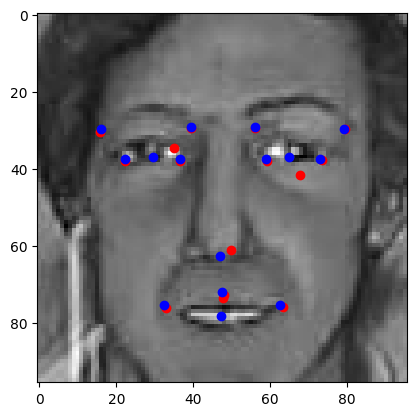

In [ ]:
y_val = pd.DataFrame(y_val)
model_1_predictions = pd.DataFrame(model_1_predictions)
IMGNo = random.randint(0,len(X_val)-1)
plt.imshow(X_val[IMGNo],cmap='gray')
plt.plot([y_val.iloc[IMGNo,::2]*96],[y_val.iloc[IMGNo,1::2]*96],'ro');
plt.plot([model_1_predictions.iloc[IMGNo,::2]*96],[model_1_predictions.iloc[IMGNo,1::2]*96],'bo');

In [ ]:
test_image_paths =sorted(glob.glob('/content/images/test_images/*'))


1783

In [ ]:
test_images = []
for i in test_image_paths:
  tim = tf.image.rgb_to_grayscale(tf.convert_to_tensor(Image.open(i),dtype = tf.float32))/255.
  test_images.append(tim)

test_images = np.array(test_images)

In [ ]:
model_1_test_predictions = model_1.predict(test_images)

56/56 [==============================] - 0s 6ms/step


In [ ]:
model_1_test_predictions = pd.DataFrame(model_1_test_predictions)*96

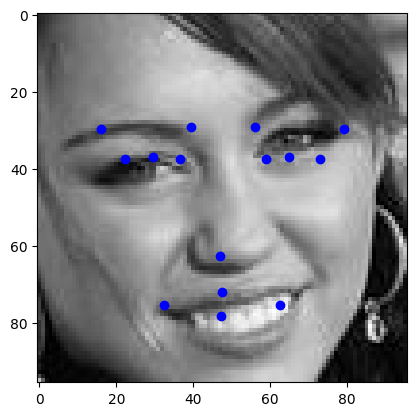

In [ ]:
IMGNo = random.randint(0,len(test_images)-1)
testImage = (test_images[IMGNo])
plt.imshow(testImage,cmap='gray')
plt.plot(model_1_test_predictions.iloc[IMGNo,::2],model_1_test_predictions.iloc[IMGNo,1::2],'bo');